In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

Puntos que se van a ajustar a una línea recta son: 

$(0,1)$ y $(1,0)$

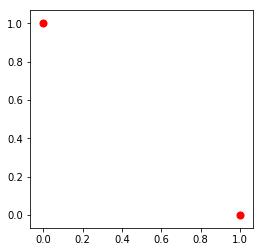

In [2]:
plt.figure(figsize = (4,4))
plt.scatter([0, 1], [1, 0], c = "r", s = 50);

In [3]:
def recta_y(x, beta1, beta0):
    return beta1*x + beta0

In [4]:
x = np.linspace(0,1)

In [5]:
sns.set_style("darkgrid")

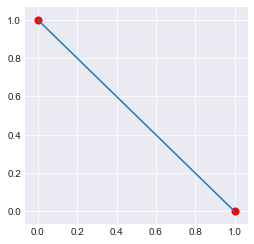

In [6]:
plt.figure(figsize = (4,4))
plt.scatter([0, 1], [1, 0], c = "r", s = 50)
plt.plot(x, recta_y(x,-1, 1));

### Ajustar puntos con ruido

In [7]:
x = np.linspace(0, 1, 30)
y = 10*x + 2  + np.random.randn(30)

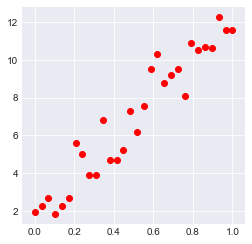

In [8]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, c = "r");

In [9]:
import scipy.optimize as opt

In [10]:
def fun_obj1(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x)**2)
beta_0 = np.array([2, 3])
res = opt.minimize(fun_obj1, beta_0, args = (x, y))
res.x

array([ 1.6031826 , 10.66872259])

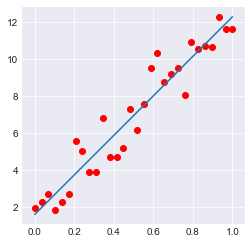

In [11]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, c = "r")
plt.plot(x, recta_y(x, res.x[1], res.x[0]));

### Otro ejemplo

In [12]:
x = np.linspace(0, 2*np.pi, 30)
y = 10*np.sin(x) + np.random.randn(30)

In [13]:
#plt.figure(figsize=(4,4))
#plt.scatter(x,y, c = "r");

In [14]:
def fun_obj1(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x)**2)
beta_0 = np.array([2, 3])
res = opt.minimize(fun_obj1, beta_0, args = (x, y))
res.x

array([ 8.58641259, -2.75664558])

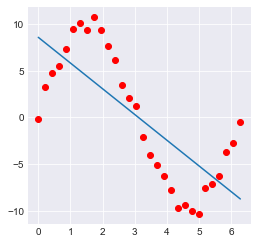

In [15]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, c = "r")
plt.plot(x, recta_y(x, res.x[1], res.x[0]));

In [16]:
def fun_obj2(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x -beta[2]*x**2)**2)
beta_0 = np.random.random(3)
res = opt.minimize(fun_obj2, beta_0, args = (x, y))
res.x

array([ 8.96707132, -3.1331304 ,  0.05991944])

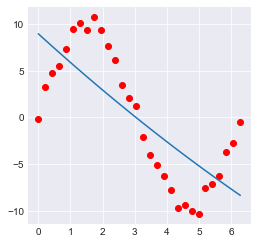

In [17]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, c = "r")
plt.plot(x, res.x[2]*x**2 + res.x[1]*x + res.x[0]);

#### Parábola

In [21]:
def obj3(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x-beta[2]*x**2- beta[3]*x**3)**2)

b0 = np.random.random((4,))

In [22]:
res = opt.minimize(obj3, b0, args = (x, y))
res.x

array([-0.6712816 , 16.99949426, -8.08784677,  0.86450485])

In [23]:
yhat3 = res.x[0] + res.x[1]*x + res.x[2]*x**2 + res.x[3]*x**3

Recordar que 
$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$$

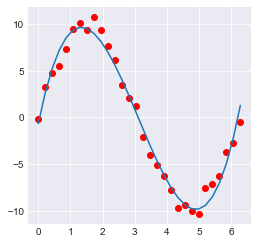

In [24]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, c = "r")
plt.plot(x, yhat3);

Ajuste de un polinomio de orden $n$. 

In [26]:
help(np.exp)

Help on ufunc object:

exp = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array o

In [32]:
def obj(b, x, y, n):
    """ 
    Parameters
    
    x: array_like, Coordenada, eje horizontal  
    y: array_like, Coordenada, eje vertical,
    b: array_like, coeficientes de un polinomio,
    n: int, grado del polinomio
    
    Returns
    float
    """
    return np.sum((y - np.array([x**i for i in range(n + 1)]).T.dot(b))**2)

In [33]:
help(obj)

Help on function obj in module __main__:

obj(b, x, y, n)
    Parameters
    
    x: array_like, Coordenada, eje horizontal  
    y: array_like, Coordenada, eje vertical,
    b: array_like, coeficientes de un polinomio,
    n: int, grado del polinomio
    
    Returns
    float



In [55]:
def nyhat(x, n):
    b = np.random.random(n + 1)
    return np.array([x**i for i in range(n + 1)]).T.dot(b)

In [60]:
x = np.linspace(-1.5, 1.5)

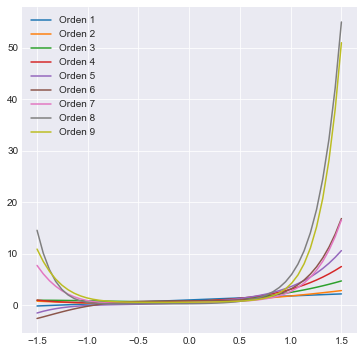

In [62]:
plt.figure(figsize=(6,6))
for i in range(1, 10):
    plt.plot(x, nyhat(x, i), label = "Orden %s" %i)
plt.legend()
plt.show()

### Tarea 

Definir una fución para un polinomio $n$.

In [ ]:
def polinomio_n(x, n, betas):
    return 

###  Actividad

In [63]:
def f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [64]:
x = np.linspace(-3, 3)
y = f(x) + 0.04*np.random.randn(50)

In [66]:
sns.set_style("ticks")

### Formato general plots

In [75]:
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

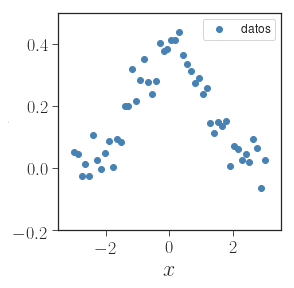

In [90]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, color="steelblue", label = 'datos')
plt.legend(loc = 'best', prop={'size': 12}, frameon=True)
plt.xlabel('$x$', fontsize = 22)
plt.ylabel('$y$', fontsize = 2)
plt.xlim(xmax = 3.5, xmin = -3.5)
plt.ylim(ymin = -.2, ymax = .5)
plt.grid(False)
plt.show()

In [91]:
def obj(b, x, y, n):
    return np.sum((y - np.array([x**i for i in range(n + 1)]).T.dot(b))**2)

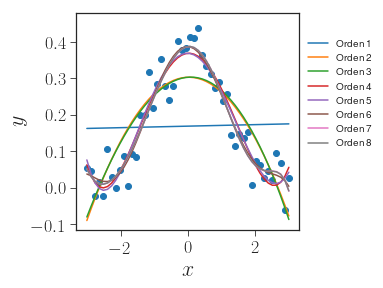

In [158]:
error = []
plt.figure(figsize = (4,4))
plt.scatter(x,y)
for i in range(1,9):
    b0 = np.random.random((i + 1,))
    res = opt.minimize(obj, b0, args=(x,y, i))
    yhat = np.array([x**j for j in range(i + 1)]).T.dot(res.x)
    error.append(np.sum(y - yhat)**2)
    plt.plot(x, yhat, label = "Orden %s" % i)
plt.legend(bbox_to_anchor=[1, .92])
plt.xlabel("$x$", fontsize = 22)
plt.ylabel("$y$", fontsize = 22)
plt.show()

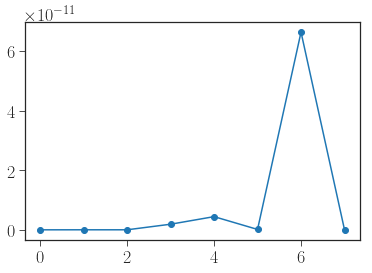

In [156]:
plt.plot(error, 'o-');